In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Entrenamiento y test
===========

Para evaluar que tal generalizan nuestros modelos supervisados, podemos dividir los datos en un conjunto de entrenamiento y otro de test:
<img src="figures/train_test_split_matrix.svg" width="100%">

In [14]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X, y = iris.data, iris.target

classifier = KNeighborsClassifier()

Si pensamos la forma en que normalmente se aplica el aprendizaje automático, la idea de una partición de entrenamiento y test tiene sentido. Los sistemas del mundo real se entrenan utilizando los datos de los que se dispone y, conforme otros datos llegan (de nuevos clientes, de otros sensores o de otras fuentes), el modelo que fue previamente entrenado debe predecir *nuevos* datos. Podemos simular esto durante el aprendizaje mediante una partición train/test -- los datos de test serán una simulación de "datos futuros" que vendrán al sistema en la etapa de producción.

Específicamente para iris, las 150 etiquetas están ordenadas, lo que significa que si dividimos los datos de forma directa y proporcional, alteraremos la distribución de las clases. Por ejemplo, si realizaremos una partición bastante común consistente en 2/3 para entrenamiento y 1/3 para test, nuestros datos de entrenamiento solo tendrían flores de las clases 0 y 1 (Setosa and Versicolor), y nuestros datos de test solo tendrían flores de la clase 2 (Virginica).

Bajo la suposición de que todos los ejemplos son independientes entre si (que no puede hacerse con datos de series temporales), sería necesario **barajar aleatoriamente** el dataset antes de dividirlo.

Ahora tenemos que hacer la partición. Afortunadamente, esto es bastante común en aprendizaje automático y scikit-learn tiene una función ya implementada para dividir en entrenamiento y test. Vamos a utilizar el 50% de los datos para entrenamiento y el 50% restante para test. Un 80% y un 20% es otra opción bastante común, aunque realmente depende mucho de los problemas tratados. Lo más importante para realizar una evaluación justa es que **la evaluación se haga utilizando datos que no han sido utilizados para el entrenamiento**.

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.5,
                                                    test_size=0.5,
                                                    random_state=123)
print("Etiquetas para los datos de entrenamiento y test")
print(train_y)
print(test_y)

Etiquetas para los datos de entrenamiento y test
[1 1 0 2 2 0 0 1 1 2 0 0 1 0 1 2 0 2 0 0 1 0 0 1 2 1 1 1 0 0 1 2 0 0 1 1 1
 2 1 1 1 2 0 0 1 2 2 2 2 0 1 0 1 1 0 1 2 1 2 2 0 1 0 2 2 1 1 2 2 1 0 1 1 2
 2]
[1 2 2 1 0 2 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 0 0 0 2 2 0 2 2 0 0 1 1 2
 0 0 1 1 0 2 2 2 2 2 1 0 0 2 0 0 1 1 1 1 2 1 2 0 2 1 0 0 2 1 2 2 0 1 1 2 0
 2]


**Consejo: partición estratificada**

Especialmente cuando tratamos conjuntos de datos relativamente pequeños, es mejor estratificar la partición. La estratificación significa que mantenemos la proporción de datos por clase que había originalmente en los subconjuntos generados. Por ejemplo, después de dividir aleatoriamente el dataset como hicimos en el ejemplo anterior, podemos comprobar que tenemos las siguientes proporciones por clase:

In [5]:
print('Todos:', np.bincount(y) / float(len(y)) * 100.0)
print('Entrenamiento:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)

Todos: [ 33.33333333  33.33333333  33.33333333]
Entrenamiento: [ 30.66666667  40.          29.33333333]
Test: [ 36.          26.66666667  37.33333333]


Para conseguir realizar una partición estratificada, tenemos que incluir el array de etiquetas cuando invocamos a la función `train_test_split`:

In [6]:
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.5,
                                                    test_size=0.5,
                                                    random_state=123,
                                                    stratify=y)

print('Todos:', np.bincount(y) / float(len(y)) * 100.0)
print('Entrenamiento:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)

Todos: [ 33.33333333  33.33333333  33.33333333]
Entrenamiento: [ 33.33333333  33.33333333  33.33333333]
Test: [ 33.33333333  33.33333333  33.33333333]


---

Si evaluamos el rendimiento de nuestro clasificador con datos que se han empleado para el entrenamiento, podríamos llegar a unos resultados demasiado optimistas. En el peor caso, el modelo puede simplemente memorizar los datos de entrenamiento, pero fallar estrepitosamente cuando tenga que clasificar nuevos datos similares - nunca querríamos tener un sistema así en producción.

En lugar de usar el mismo dataset para entrenamiento y test (lo que se conoce como "evaluación por resubstitución"), es mucho mejor usar una partición de entrenamiento y test para así estimar como de bien se comporta el modelo entrenado con datos nuevos.

In [8]:
classifier.fit(train_X, train_y)
pred_y = classifier.predict(test_X)

print("CCR [Accuracy]:")
print(np.mean(pred_y == test_y))

CCR [Accuracy]:
0.96


Podemos visualizar los aciertos y los fallos:

In [10]:
print('Ejemplos correctamente clasificados:')
correct_idx = np.where(pred_y == test_y)[0]
print(correct_idx)

print('\nEjemplos incorrectamente clasificados:')
incorrect_idx = np.where(pred_y != test_y)[0]
print(incorrect_idx)

Ejemplos correctamente clasificados:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48 50 51
 52 53 54 55 56 57 58 59 61 62 63 64 65 66 67 68 69 70 71 72 73 74]

Ejemplos incorrectamente clasificados:
[44 49 60]


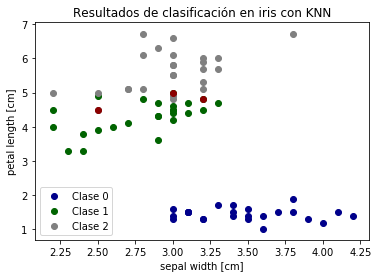

In [11]:
# Representar en 2D

colors = ["darkblue", "darkgreen", "gray"]

for n, color in enumerate(colors):
    idx = np.where(test_y == n)[0]
    plt.scatter(test_X[idx, 1], test_X[idx, 2], color=color, label="Clase %s" % str(n))

plt.scatter(test_X[incorrect_idx, 1], test_X[incorrect_idx, 2], color="darkred")

plt.xlabel('sepal width [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc=3)
plt.title("Resultados de clasificación en iris con KNN")
plt.show()

Podemos ver que los errores se corresponden con áreas donde el verde (clase 1) y el gris (clase 2) se superponen. Esto nos da una pista acerca de qué características añadir -- cualquier característica que ayude a separar las clases 1 y 2 debería mejorar el rendimiento.

<div class="alert alert-success">
    <b>Ejercicio</b>:
     <ul>
      <li>
      Imprime las etiquetas reales de 3 malas predicciones y modifica el código del scatterplot, que utilizamos anteriormente, para visualizar y distinguir estos tres ejemplos con distintos marcadores en el scatterplot 2D. ¿Podrías explicar porque el clasificador realizó malas predicciones?
      </li>
    </ul>
</div>